In [96]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [97]:
data=pd.read_csv('titanic.csv')

In [98]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [101]:
x=data.drop(['Cabin','Survived'],axis=1)
y=data['Survived'].copy()

In [102]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [103]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [104]:
x["Age"]=x["Age"].fillna(x["Age"].mean())

In [105]:
x["Embarked"]=x["Embarked"].fillna(x["Embarked"].mode()[0])

In [106]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [107]:
from sklearn import preprocessing
#encoding categorical data
num_cols = x._get_numeric_data().columns
cols=x.columns
cat_cols=list(set(cols) - set(num_cols))

for col in cat_cols:
    le = preprocessing.LabelEncoder()
    x[col] = le.fit_transform(x[col])
x.shape

(891, 10)

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [110]:
from sklearn.ensemble import RandomForestClassifier
rndm_frst=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rndm_frst.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [111]:
y_rndm = rndm_frst.predict(x_test)

In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_rndm)
print(cm)

[[101   9]
 [ 17  52]]


In [113]:
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix,make_scorer

def tn(y_test,y_rndm): return confusion_matrix(y_test,y_rndm)[0,0]
def fp(y_test,y_rndm): return confusion_matrix(y_test,y_rndm)[0,1]
def fn(y_test,y_rndm): return confusion_matrix(y_test,y_rndm)[1,0]
def tp(y_test,y_rndm): return confusion_matrix(y_test,y_rndm)[1,1]
def tpr(y_test,y_rndm): 
    no_tp = confusion_matrix(y_test,y_rndm)[1,1]
    no_fn = confusion_matrix(y_test,y_rndm)[1,0]
    return round((no_tp / (no_tp + no_fn)),2)

def tnr(y_test,y_rndm): 
    no_tn = confusion_matrix(y_test,y_rndm)[0,0]
    no_fp = confusion_matrix(y_test,y_rndm)[0,1]
   
    return round((no_tn / (no_tn + no_fp)),2)

def fpr(y_test,y_rndm): 
    no_tn = confusion_matrix(y_test,y_rndm)[0,0]
    no_fp = confusion_matrix(y_test,y_rndm)[0,1]
    
    return round((no_fp / (no_tn + no_fp)),2)

def fnr(y_test,y_rndm): 
    no_tp = confusion_matrix(y_test,y_rndm)[1,1]
    no_fn = confusion_matrix(y_test,y_rndm)[1,0]
    return round((no_fn / (no_tp + no_fn)),2)
def Recall(y_test,y_rndm):
    no_tp = confusion_matrix(y_test,y_rndm)[1,1]
    no_fn = confusion_matrix(y_test,y_rndm)[1,0]
    return round((no_tp / (no_tp + no_fn)),2)
def Precision(y_test,y_rndm):
    no_tp = confusion_matrix(y_test,y_rndm)[1,1]
    no_fp = confusion_matrix(y_test,y_rndm)[0,1]
    return round((no_tp / (no_tp + no_fp)),2)

def F1Score(y_test,y_rndm):
    no_tp = confusion_matrix(y_test,y_rndm)[1,1]
    no_fp = confusion_matrix(y_test,y_rndm)[0,1]
    no_fn = confusion_matrix(y_test,y_rndm)[1,0]
    return round(((2*no_tp) / ((2*no_tp) + no_fp+no_fn)),2)

def Accuracy(y_test,y_rndm):
    no_tn = confusion_matrix(y_test,y_rndm)[0,0]
    no_fp = confusion_matrix(y_test,y_rndm)[0,1]
    no_tp = confusion_matrix(y_test,y_rndm)[1,1]
    no_fn = confusion_matrix(y_test,y_rndm)[1,0]
    return round(((no_tp + no_tn) / (no_tp + no_fp + no_fn + no_tn)),2)

def Error(y_test,y_rndm):
    no_tn = confusion_matrix(y_test,y_rndm)[0,0]
    no_fp = confusion_matrix(y_test,y_rndm)[0,1]
    no_tp = confusion_matrix(y_test,y_rndm)[1,1]
    no_fn = confusion_matrix(y_test,y_rndm)[1,0]
    return round(((no_fp + no_fn) / (no_tp + no_fp + no_fn + no_tn)),2)
def BACC(y_test,y_rndm):
    no_tn = confusion_matrix(y_test,y_rndm)[0,0]
    no_fp = confusion_matrix(y_test,y_rndm)[0,1]
    no_tp = confusion_matrix(y_test,y_rndm)[1,1]
    no_fn = confusion_matrix(y_test,y_rndm)[1,0]
    return round(0.5*((no_tp / (no_tp + no_fn))+(no_tn / (no_fp + no_tn))),2)

def TSS(y_test,y_rndm):
    no_tn = confusion_matrix(y_test,y_rndm)[0,0]
    no_fp = confusion_matrix(y_test,y_rndm)[0,1]
    no_tp = confusion_matrix(y_test,y_rndm)[1,1]
    no_fn = confusion_matrix(y_test,y_rndm)[1,0]
    return round((no_tp / (no_tp + no_fn))-(no_fp / (no_fp + no_tn)),2)

def HSS(y_test,y_rndm):
    no_tn = confusion_matrix(y_test,y_rndm)[0,0]
    no_fp = confusion_matrix(y_test,y_rndm)[0,1]
    no_tp = confusion_matrix(y_test,y_rndm)[1,1]
    no_fn = confusion_matrix(y_test,y_rndm)[1,0]
    return round((2*((no_tp * no_tn)-(no_fp * no_fn)))/(((no_tp + no_fn)*(no_fn + no_tn))+((no_tp + no_fp)*(no_fp + no_tn))),2)

    

#def tpr(ans_tp,ans_fn): return ans_tp/(ans_tp+ans_fn)
scoring = {'tp': make_scorer(tp),'tn': make_scorer(tn),'fp': make_scorer(fp),'fn': make_scorer(fn),'tpr': make_scorer(tpr),
           'tnr':make_scorer(tnr),'fpr':make_scorer(fpr),'fnr':make_scorer(fnr),'recall':make_scorer(Recall),
           'precision':make_scorer(Precision),'F1Score':make_scorer(F1Score),
           'Accuracy':make_scorer(Accuracy),'Error':make_scorer(Error),'BACC':make_scorer(BACC),'TSS':make_scorer(TSS),
           'HSS':make_scorer(HSS)}

In [114]:
cv = KFold(n_splits=10,random_state=1,shuffle=False)
scores = cross_validate(rndm_frst,x_train,y_train,scoring = scoring,cv=cv)

In [115]:
print(scores)

{'fit_time': array([0.0245223 , 0.01494789, 0.03021932, 0.01559067, 0.02217698,
       0.01565719, 0.02150559, 0.01595998, 0.00701976, 0.02134228]), 'score_time': array([0.03459859, 0.03125405, 0.03129125, 0.03125501, 0.03125501,
       0.03122282, 0.04016352, 0.0367136 , 0.03125501, 0.04054475]), 'test_tp': array([17, 14, 21, 15, 20, 18, 19, 17, 21, 21]), 'test_tn': array([42, 39, 40, 45, 41, 36, 37, 42, 39, 32]), 'test_fp': array([3, 6, 6, 5, 5, 9, 5, 0, 4, 3]), 'test_fn': array([10, 13,  4,  6,  5,  8, 10, 12,  7, 15]), 'test_tpr': array([0.63, 0.52, 0.84, 0.71, 0.8 , 0.69, 0.66, 0.59, 0.75, 0.58]), 'test_tnr': array([0.93, 0.87, 0.87, 0.9 , 0.89, 0.8 , 0.88, 1.  , 0.91, 0.91]), 'test_fpr': array([0.07, 0.13, 0.13, 0.1 , 0.11, 0.2 , 0.12, 0.  , 0.09, 0.09]), 'test_fnr': array([0.37, 0.48, 0.16, 0.29, 0.2 , 0.31, 0.34, 0.41, 0.25, 0.42]), 'test_recall': array([0.63, 0.52, 0.84, 0.71, 0.8 , 0.69, 0.66, 0.59, 0.75, 0.58]), 'test_precision': array([0.85, 0.7 , 0.78, 0.75, 0.8 , 0.67, 0.

In [116]:
column = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Fold 6','Fold 7','Fold 8','Fold 9','Fold 10','Average']
row = ['TP','TN','FP','FN','TPR','TNR','FPR','FNR','Recall','Precision','F1 Score','Accuracy','Error','BACC','TSS','HSS']
 

data_rf = [value for value in scores.values()]
data_rf = data_rf[2:]

In [117]:
for i in range(len(data_rf)):
    avg = round(sum(data_rf[i])/len(data_rf[i]),2)
    temp = list(data_rf[i])
    temp.append(avg)
    data_rf[i]=temp
print(data_rf)  

[[17, 14, 21, 15, 20, 18, 19, 17, 21, 21, 18.3], [42, 39, 40, 45, 41, 36, 37, 42, 39, 32, 39.3], [3, 6, 6, 5, 5, 9, 5, 0, 4, 3, 4.6], [10, 13, 4, 6, 5, 8, 10, 12, 7, 15, 9.0], [0.63, 0.52, 0.84, 0.71, 0.8, 0.69, 0.66, 0.59, 0.75, 0.58, 0.68], [0.93, 0.87, 0.87, 0.9, 0.89, 0.8, 0.88, 1.0, 0.91, 0.91, 0.9], [0.07, 0.13, 0.13, 0.1, 0.11, 0.2, 0.12, 0.0, 0.09, 0.09, 0.1], [0.37, 0.48, 0.16, 0.29, 0.2, 0.31, 0.34, 0.41, 0.25, 0.42, 0.32], [0.63, 0.52, 0.84, 0.71, 0.8, 0.69, 0.66, 0.59, 0.75, 0.58, 0.68], [0.85, 0.7, 0.78, 0.75, 0.8, 0.67, 0.79, 1.0, 0.84, 0.88, 0.81], [0.72, 0.6, 0.81, 0.73, 0.8, 0.68, 0.72, 0.74, 0.79, 0.7, 0.73], [0.82, 0.74, 0.86, 0.85, 0.86, 0.76, 0.79, 0.83, 0.85, 0.75, 0.81], [0.18, 0.26, 0.14, 0.15, 0.14, 0.24, 0.21, 0.17, 0.15, 0.25, 0.19], [0.78, 0.69, 0.85, 0.81, 0.85, 0.75, 0.77, 0.79, 0.83, 0.75, 0.79], [0.56, 0.39, 0.71, 0.61, 0.69, 0.49, 0.54, 0.59, 0.66, 0.5, 0.57], [0.59, 0.41, 0.7, 0.62, 0.69, 0.49, 0.55, 0.63, 0.67, 0.5, 0.58]]


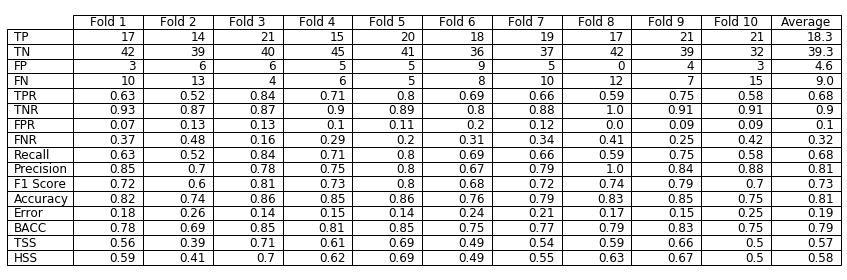

In [118]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()


fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

the_table=ax.table(cellText=data_rf, rowLabels=row, colLabels=column,loc='center',colWidths=[0.17 for x in column])
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
fig.tight_layout()
plt.show()


In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [120]:
y_knn = knn.predict(x_test)

In [121]:
tp(y_test,y_knn)
tn(y_test,y_knn)
fp(y_test,y_knn)
fn(y_test,y_knn)
tpr(y_test,y_knn)
tnr(y_test,y_knn)
fpr(y_test,y_knn)
fnr(y_test,y_knn)
Recall(y_test,y_knn)
Precision(y_test,y_knn)
F1Score(y_test,y_knn)
Accuracy(y_test,y_knn)
Error(y_test,y_knn)
BACC(y_test,y_knn)
TSS(y_test,y_knn)
HSS(y_test,y_knn)

0.63

In [122]:
cv = KFold(n_splits=10,random_state=1,shuffle=False)
scores_knn = cross_validate(knn,x_train,y_train,scoring = scoring,cv=cv)

In [123]:
print(scores_knn)

{'fit_time': array([0.00851226, 0.        , 0.        , 0.        , 0.01562762,
       0.01713562, 0.00415826, 0.        , 0.        , 0.        ]), 'score_time': array([0.10906124, 0.11591935, 0.12157798, 0.11758542, 0.10028219,
       0.11284685, 0.1189189 , 0.0690341 , 0.07814121, 0.06717968]), 'test_tp': array([17, 14, 21, 11, 20, 18, 20, 18, 21, 22]), 'test_tn': array([38, 38, 42, 44, 40, 39, 34, 37, 38, 32]), 'test_fp': array([7, 7, 4, 6, 6, 6, 8, 5, 5, 3]), 'test_fn': array([10, 13,  4, 10,  5,  8,  9, 11,  7, 14]), 'test_tpr': array([0.63, 0.52, 0.84, 0.52, 0.8 , 0.69, 0.69, 0.62, 0.75, 0.61]), 'test_tnr': array([0.84, 0.84, 0.91, 0.88, 0.87, 0.87, 0.81, 0.88, 0.88, 0.91]), 'test_fpr': array([0.16, 0.16, 0.09, 0.12, 0.13, 0.13, 0.19, 0.12, 0.12, 0.09]), 'test_fnr': array([0.37, 0.48, 0.16, 0.48, 0.2 , 0.31, 0.31, 0.38, 0.25, 0.39]), 'test_recall': array([0.63, 0.52, 0.84, 0.52, 0.8 , 0.69, 0.69, 0.62, 0.75, 0.61]), 'test_precision': array([0.71, 0.67, 0.84, 0.65, 0.77, 0.75, 0.

In [124]:
data_knn = [value for value in scores_knn.values()]
data_knn = data_knn[2:]

In [125]:
print(data_knn)

[array([17, 14, 21, 11, 20, 18, 20, 18, 21, 22]), array([38, 38, 42, 44, 40, 39, 34, 37, 38, 32]), array([7, 7, 4, 6, 6, 6, 8, 5, 5, 3]), array([10, 13,  4, 10,  5,  8,  9, 11,  7, 14]), array([0.63, 0.52, 0.84, 0.52, 0.8 , 0.69, 0.69, 0.62, 0.75, 0.61]), array([0.84, 0.84, 0.91, 0.88, 0.87, 0.87, 0.81, 0.88, 0.88, 0.91]), array([0.16, 0.16, 0.09, 0.12, 0.13, 0.13, 0.19, 0.12, 0.12, 0.09]), array([0.37, 0.48, 0.16, 0.48, 0.2 , 0.31, 0.31, 0.38, 0.25, 0.39]), array([0.63, 0.52, 0.84, 0.52, 0.8 , 0.69, 0.69, 0.62, 0.75, 0.61]), array([0.71, 0.67, 0.84, 0.65, 0.77, 0.75, 0.71, 0.78, 0.81, 0.88]), array([0.67, 0.58, 0.84, 0.58, 0.78, 0.72, 0.7 , 0.69, 0.78, 0.72]), array([0.76, 0.72, 0.89, 0.77, 0.85, 0.8 , 0.76, 0.77, 0.83, 0.76]), array([0.24, 0.28, 0.11, 0.23, 0.15, 0.2 , 0.24, 0.23, 0.17, 0.24]), array([0.74, 0.68, 0.88, 0.7 , 0.83, 0.78, 0.75, 0.75, 0.82, 0.76]), array([0.47, 0.36, 0.75, 0.4 , 0.67, 0.56, 0.5 , 0.5 , 0.63, 0.53]), array([0.48, 0.38, 0.75, 0.43, 0.66, 0.57, 0.5 , 0.52,

In [126]:
for i in range(len(data_knn)):
    avg = round(sum(data_knn[i])/len(data_knn[i]),2)
    temp = list(data_knn[i])
    temp.append(avg)
    data_knn[i]=temp
print(data_knn) 

[[17, 14, 21, 11, 20, 18, 20, 18, 21, 22, 18.2], [38, 38, 42, 44, 40, 39, 34, 37, 38, 32, 38.2], [7, 7, 4, 6, 6, 6, 8, 5, 5, 3, 5.7], [10, 13, 4, 10, 5, 8, 9, 11, 7, 14, 9.1], [0.63, 0.52, 0.84, 0.52, 0.8, 0.69, 0.69, 0.62, 0.75, 0.61, 0.67], [0.84, 0.84, 0.91, 0.88, 0.87, 0.87, 0.81, 0.88, 0.88, 0.91, 0.87], [0.16, 0.16, 0.09, 0.12, 0.13, 0.13, 0.19, 0.12, 0.12, 0.09, 0.13], [0.37, 0.48, 0.16, 0.48, 0.2, 0.31, 0.31, 0.38, 0.25, 0.39, 0.33], [0.63, 0.52, 0.84, 0.52, 0.8, 0.69, 0.69, 0.62, 0.75, 0.61, 0.67], [0.71, 0.67, 0.84, 0.65, 0.77, 0.75, 0.71, 0.78, 0.81, 0.88, 0.76], [0.67, 0.58, 0.84, 0.58, 0.78, 0.72, 0.7, 0.69, 0.78, 0.72, 0.71], [0.76, 0.72, 0.89, 0.77, 0.85, 0.8, 0.76, 0.77, 0.83, 0.76, 0.79], [0.24, 0.28, 0.11, 0.23, 0.15, 0.2, 0.24, 0.23, 0.17, 0.24, 0.21], [0.74, 0.68, 0.88, 0.7, 0.83, 0.78, 0.75, 0.75, 0.82, 0.76, 0.77], [0.47, 0.36, 0.75, 0.4, 0.67, 0.56, 0.5, 0.5, 0.63, 0.53, 0.54], [0.48, 0.38, 0.75, 0.43, 0.66, 0.57, 0.5, 0.52, 0.64, 0.52, 0.54]]


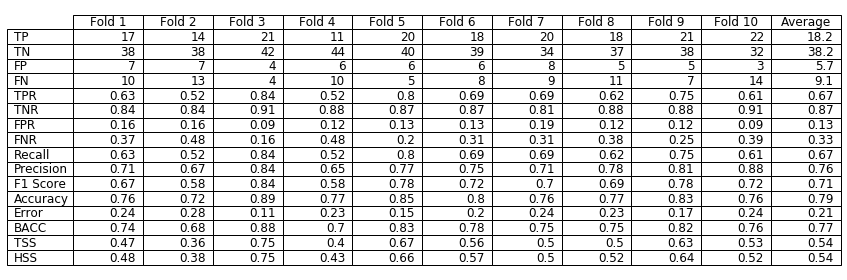

In [127]:
fig2,ax2 = plt.subplots()

# hide axes
fig2.patch.set_visible(False)
ax2.axis('off')
ax2.axis('tight')

the_table2=ax2.table(cellText=data_knn, rowLabels=row, colLabels=column,loc='center',colWidths=[0.17 for x in column])
the_table2.auto_set_font_size(False)
the_table2.set_fontsize(12)
fig2.tight_layout()
plt.show()

In [128]:
from keras.utils import to_categorical
from keras.layers import Dense,RNN,LSTM,Activation,Dropout
from keras.models import Sequential

In [129]:
x.shape

(891, 10)

In [130]:
y.shape

(891,)

In [131]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [132]:
model = Sequential() # initializing model

# input layer and LSTM layer with 50 neurons
model.add(LSTM(units=50, return_sequences=False, input_shape=(x_train.shape[1],1)))
# outpute layer with sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# defining loss function, optimizer, metrics and then compiling model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# training the model on training dataset
model.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Train on 569 samples, validate on 143 samples
Epoch 1/100
569/569 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5835 - val_loss: 0.6873 - val_accuracy: 0.6154
Epoch 2/100
569/569 [==============================] - 0s 93us/step - loss: 0.6880 - accuracy: 0.6098 - val_loss: 0.6849 - val_accuracy: 0.6364
Epoch 3/100
569/569 [==============================] - 0s 72us/step - loss: 0.6854 - accuracy: 0.6257 - val_loss: 0.6825 - val_accuracy: 0.6503
Epoch 4/100
569/569 [==============================] - 0s 95us/step - loss: 0.6827 - accuracy: 0.6327 - val_loss: 0.6801 - val_accuracy: 0.6434
Epoch 5/100
569/569 [==============================] - 0s 71us/step - loss: 0.6800 - accuracy: 0.6397 - val_loss: 0.6777 - val_accuracy: 0.6713
Epoch 6/100
569/569 [==============================] - 0s 99us/step - loss: 0.6773 - accuracy: 0.6397 - val_loss: 0.6752 - val_accuracy: 0.6713
Epoch 7/100
569/569 [==============================] - 0s 79us/step - loss: 0.6744 - accura

Epoch 58/100
569/569 [==============================] - 0s 84us/step - loss: 0.5599 - accuracy: 0.7083 - val_loss: 0.5771 - val_accuracy: 0.7133
Epoch 59/100
569/569 [==============================] - 0s 77us/step - loss: 0.5595 - accuracy: 0.7083 - val_loss: 0.5771 - val_accuracy: 0.7133
Epoch 60/100
569/569 [==============================] - 0s 73us/step - loss: 0.5590 - accuracy: 0.7083 - val_loss: 0.5771 - val_accuracy: 0.7133
Epoch 61/100
569/569 [==============================] - 0s 78us/step - loss: 0.5585 - accuracy: 0.7065 - val_loss: 0.5768 - val_accuracy: 0.7203
Epoch 62/100
569/569 [==============================] - 0s 77us/step - loss: 0.5580 - accuracy: 0.7083 - val_loss: 0.5765 - val_accuracy: 0.7203
Epoch 63/100
569/569 [==============================] - 0s 95us/step - loss: 0.5575 - accuracy: 0.7100 - val_loss: 0.5759 - val_accuracy: 0.7203
Epoch 64/100
569/569 [==============================] - 0s 78us/step - loss: 0.5569 - accuracy: 0.7100 - val_loss: 0.5753 - val_ac

In [133]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
test_results = model.predict(x_test)
#print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

In [135]:
test_results

array([[0.12659882],
       [0.08054511],
       [0.09860588],
       [0.6048251 ],
       [0.2658898 ],
       [0.43075976],
       [0.4291093 ],
       [0.3792658 ],
       [0.685568  ],
       [0.4671219 ],
       [0.16024047],
       [0.42576683],
       [0.21644612],
       [0.74285764],
       [0.8494394 ],
       [0.60164607],
       [0.20450632],
       [0.23778091],
       [0.26455316],
       [0.19448587],
       [0.77344036],
       [0.8562716 ],
       [0.14158723],
       [0.74185616],
       [0.38769823],
       [0.44661143],
       [0.12774952],
       [0.62428087],
       [0.3634159 ],
       [0.1952403 ],
       [0.14018522],
       [0.23046358],
       [0.15662804],
       [0.43206137],
       [0.2909979 ],
       [0.26463786],
       [0.09873343],
       [0.42079914],
       [0.565482  ],
       [0.17038527],
       [0.20754303],
       [0.14377418],
       [0.12067292],
       [0.06472361],
       [0.70250046],
       [0.20524788],
       [0.11538535],
       [0.493

In [146]:
test_results=np.array(test_results)
for i in range(len(test_results)):
    if test_results[[i]]<0.5:
        test_results[i]=0
    else:
        test_results[i]=1

In [151]:
tp(y_test,test_results)

37

In [152]:
tn(y_test,test_results)

90

In [153]:
fp(y_test,test_results)

20

In [154]:
fn(y_test,test_results)

32

In [155]:
tpr(y_test,test_results)

0.54

In [156]:
tnr(y_test,test_results)

0.82

In [157]:
fpr(y_test,test_results)

0.18

In [158]:
fnr(y_test,test_results)

0.46

In [159]:
Recall(y_test,test_results)

0.54

In [160]:
Precision(y_test,test_results)

0.65

In [161]:
F1Score(y_test,test_results)

0.59

In [162]:
Accuracy(y_test,test_results)

0.71

In [163]:
Error(y_test,test_results)

0.29

In [164]:
BACC(y_test,test_results)


0.68

In [165]:
TSS(y_test,test_results)

0.35

In [166]:
HSS(y_test,test_results)

0.37

In [167]:
metrics=[[18.3,18.2,37],[39.3,38.2,90],[4.6,5.7,20],[9.0,9.1,32],[0.68,0.67,0.54],[0.9,0.87,0.82],[0.1,0.13,0.18],[0.32,0.33,0.76],[0.68,0.67,0.54],[0.81,0.76,0.65],[0.73,0.71,0.59],[0.81,0.79,0.71],[0.19,0.21,0.29],[0.79,0.77,0.68],[0.57,0.54,0.35],[0.58,0.54,0.37]]

In [168]:
column1 = ['Random Forest','KNN','LSTM']
row1 = ['TP','TN','FP','FN','TPR','TNR','FPR','FNR','Recall','Precision','F1 Score','Accuracy','Error','BACC','TSS','HSS']

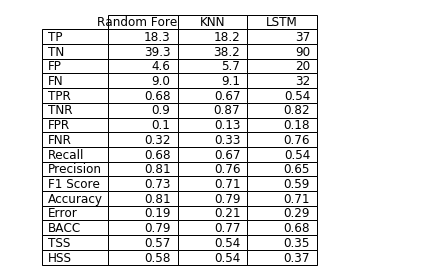

In [169]:
fig3,ax3 = plt.subplots()

# hide axes
fig3.patch.set_visible(False)
ax3.axis('off')
ax3.axis('tight')

the_table3=ax3.table(cellText=metrics, rowLabels=row1, colLabels=column1,loc='center',colWidths=[0.17 for x in column])
the_table3.auto_set_font_size(False)
the_table3.set_fontsize(12)
fig3.tight_layout()
plt.show()